## Homework #7
### Portfolio and Risk Management (Fall 2024)
### Brian Wickman

### 1. Estimating the Equity Risk Premium (Grantham, Mayo, and Van Otterloo, 2012)

#### (1) GMO's approach

(a) Why does GMO believe they can more easily predict long-run than short-run asset class performance?

In the short-run, the stock market is a voting machine prone to investor cognitive biases and random shocks (news releases, bubbles, etc.). However, in the long-run, the market is a weighing machine that rewards sales growth and strong fundamentals.

(b) What predicting variables does the case mention are used by GMO? Does this fit with the goal of long-run forecasts?

GMO uses price-earning multiples, dividends, and earnings-per-share to forecat short-run (7-year) expected returns, with the idea that their formula will converge to Merton's long-run growth model.

(c) How has this approach led to contrarian positions?

They do not rely on analyst forecasts or attempt to predict the 'noise' component of short-run expected returns. This leads to contrarian positions as the analysts tend to make the same forecasts to hedge career risk, irrespective of underlying company fundamentals.

(d) How does this approach raise business risk and managerial career risk?

"The market can remain irrational longer than an investor can remain solvent" - Benjamin Graham (I think). By maximizing long-run expected return (as opposed to short-run returns as most asset managers do), clients might get frustrated that they are missing out on hot trends and pull their assets from your fund.


#### (2) The market environment

(a) We often estimate the market risk premium by looking at a large sample of historic data. What reasons does the case give to be skeptical that the market risk premium will be as high in the future as it has been over the past 50 years?

GMO believes in paradigm drift, including that the equity risk premium is not constant. Instead, investors might demand higher/ lower compensation to hold stocks over riskless bonds in "worse" states of the world because stocks demonstrate high covariance with the real side of the economy. Thus, when unemployment is high and GDP is low, stocks also tend to be low. So if investors have varying expectations of the real side of the economy, it makes sense for the equity risk premium to be time-varying as well.

(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest drivers of their pessimistic conditional forecast relative to the unconditional forecast. 

Price-earnings ratio and profit margins were too high to be sustainable, so the current market price was higher than GMO's estimate of the true fundamental value of the market.

(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now how does their conditional forecast compare to the unconditional?

Price-earings ratio "normalized", meaning GMO's forecasts for the change in PE ratios in 2007 was -3%, whereas their 2011 forecast was a 0.0 change.

#### (3) Consider the asset class forecasts in Exhibit 1.

(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011?

They forecasted U.S. equities (S&P 500) to have a -1% annualized real return.

(b) Which asset classes substantially outperformed GMO’s estimate over that time period?

Emerging markets (+2.5%), emerging country debt (+2%), international small cap equities (+2%), and foreign government bonds (+3.5%) outperformed GMO's estimates.

(c) Which asset classes substantially underperformed GMO’s estimate over that time period?

US Real Estate Investment Trusts (REITS, -2%) and US Treasury Bills (-3%) which make sense as the real estate market was devastated during the Great Financial Crisis and the Fed cut rates to ZLB to stimulate economic activity.

#### (4) Fund performance (Exhibit 3)

(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997-2011?

On average, GMO was most heavily allocated to the US fixed income asset class, with weights ranging from 27% to 46%.

(b)  Comment on the performance of GMWAX versus its benchmark.

GMO slightly outperformed its benchmark in good states of the world, but notably excelled in limiting losses duirng years with negative returns (2000, 20001, 2002, 2008), which makes sense given their contrarian approach to markets.

### 2. Analyzing GMO 

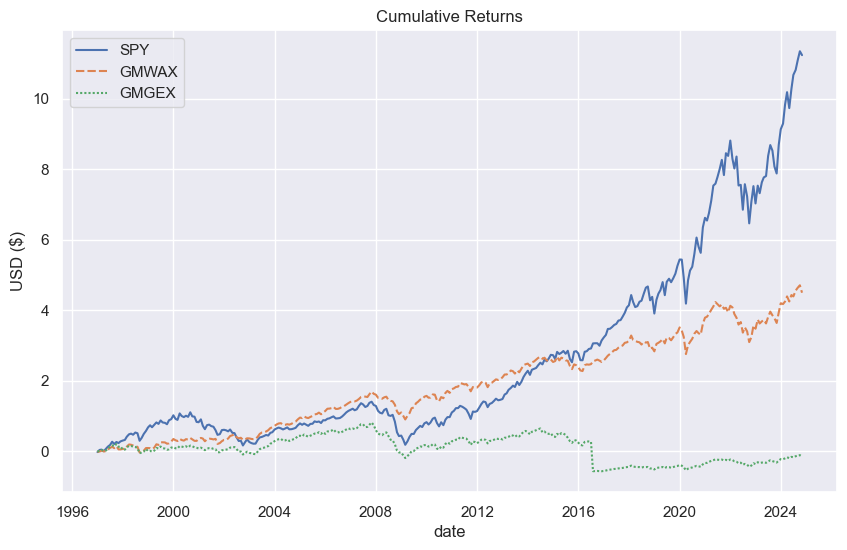

In [105]:
# Set-up & Import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import quantstats as qs
import scipy as sc
import statsmodels.api as sm
import warnings
import pprint

from werkzeug.debug.repr import helper

from helper_funcs import max_drawdown

warnings.filterwarnings("ignore")
sns.set_theme()

# import helper functions
import importlib
import helper_funcs

# Import data
FILEIN = 'data/gmo_data.xlsx'

signals = pd.read_excel(FILEIN, sheet_name='signals').set_index('date')
total_returns = pd.read_excel(FILEIN, sheet_name='total returns').set_index('date')
rf_rate = pd.read_excel(FILEIN, sheet_name='risk-free rate').set_index('date') # DO NOT ANNUALIZE

# Cumulative returns 
cumulative_returns = total_returns.apply(lambda x: (1+x).cumprod() - 1)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns)
plt.title('Cumulative Returns')
plt.ylabel('USD ($)')
plt.show()

#### (2.1) Calculate the mean, volatility, and Sharpe ratio for GMWAX for a few subsamples:

Have the summary stats changed since the case?

GMO's Global Asset Allocation Fund (GMWAX) performed consistently well from 2012-Present, delivering similar returns and volatility at a slightly higher Sharpe ratio.

#### (2.2) Is the risk premium (excess returns) compensation for tail risk?

 Does GMWAX have high or low tail-risk as seen by these stats?
 
GMWAX has medium tail-risk given the volatile market conditions during the period; the max drawdown implies that the portfolio can lose ~30% of its value during a period of decline, but the VaR is moderate (-0.05) and maximum single day loss is acceptable (-0.15)
 
 Does that vary much across the two subsamples?
 
The first period demonstrates slightly more tail risk as it includes the Great Recession (2008).

Subsample summary statistics:


,Mean,Volatility,Sharpe,Min.,VaR (0.05),Max Drawdown
1996 - 2011,0.0464,0.1105,0.4199,-0.1492,-0.0440,-0.3380
2012 - Present,0.0434,0.0949,0.4573,-0.1150,-0.0409,-0.2355
1996 - Present,0.0450,0.1035,0.4348,-0.1492,-0.0414,-0.3380


Text(0.5, 1.0, 'Full sample: tail risk of GMWAX')

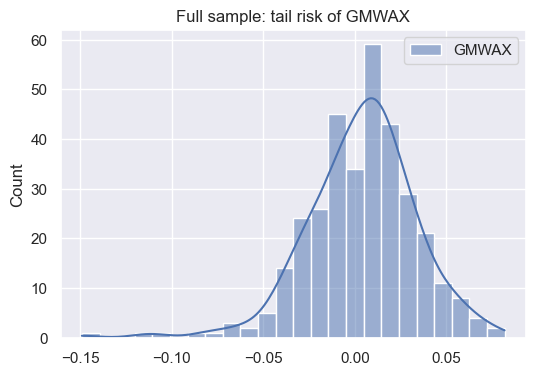

In [106]:
# Calculate (subsample) summary stats
ss1 = helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMWAX']].loc[:'2011-12-31'],
    rf_rate_series = rf_rate['TBill 3M'].loc[:'2011-12-31'])

ss2= helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMWAX']].loc['2012-01-01':],
    rf_rate_series = rf_rate['TBill 3M'].loc['2012-01-01':])

fs = helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMWAX']],
    rf_rate_series = rf_rate['TBill 3M'])

# Display results
result = pd.concat([ss1, ss2, fs], axis=0)
result.index = ['1996 - 2011', '2012 - Present', '1996 - Present']
print("Subsample summary statistics:")
display(result)

# visualize tail risk
excess_returns = total_returns.subtract(rf_rate['TBill 3M'] / 12 , axis = 0)
plt.figure(figsize=(6, 4)); sns.histplot(excess_returns[['GMWAX']], kde=True).set_title('Full sample: tail risk of GMWAX')


#### (2.3) For all three samples, regress excess returns of GMWAX on excess returns of SPY.

(a) Report the estimated alpha, beta, and r-squared.

(b) Is GMWAX a low-beta strategy? Has that changed since the case?

Yes, it has a beta of 0.55, which implies that if the market swings by 1 unit, GMWAX demonstrates half as much volatility. This provides investors more stable returns over time, irrespective of financial market conditions. No notable difference between subsamples.

(c) Does GMWAX provide alpha? Has that changed across the subsamples?

No, the alpha is extremely close to zero for both subsamples.

In [107]:
subsamples = {
    '1996 - 2011' : excess_returns.loc[:'2011-12-31'],
    '2012 - Present' : excess_returns.loc['2012-01-01':],
    '1996 - Present' : excess_returns
}

ss_regress_output = {}
for name, data in subsamples.items():
    
    # fit reg
    X = sm.add_constant(data[['SPY']]) 
    model = sm.OLS(data[['GMWAX']], X).fit()
    alpha = model.params[0].round(4)
    beta = model.params[1].round(4)
    r_sq = model.rsquared.round(4)
    
    
    # save results
    ss_regress_output[name] = [alpha, beta, r_sq]
    
reg_output_df = pd.DataFrame(ss_regress_output).T
reg_output_df.columns = ['Apha', 'Beta', 'R-Squared']
print('GMWAX CAPM Regression:')
display(reg_output_df)

GMWAX CAPM Regression:


,Apha,Beta,R-Squared
1996 - 2011,0.0023,0.5421,0.6487
2012 - Present,-0.0028,0.5818,0.7487
1996 - Present,0.0000,0.5526,0.6802


#### (2.4) Same analysis for GMO's equity fund GMGEX

(a) Does GMGEX have high or low tail-risk as seen by these stats?

GMO's equity fund has high tail-risk, the portfolio has a max drawdown of 90% and an extremely long left tail, meaning the portfolio is prone to large negative shocks. Based on the cumulative return graph (top of page), it appears the max drawdown occurred during 2016 and the portfolio has yet to recover.
 
(b) Does that vary much across the two subsamples?

No, the tail-risk is pretty consistent, although (2012-Present) period has slightly more tail risk due to 2016.

(c) Report the estimated alpha, beta, and r-squared.

(d) Is GMGEX a low-beta strategy? Has that changed since the case?

Relative to the Global Asset Allocation Portfolio, GMGEX has a higher beta (0.55 vs 0.8), although the portfolio is slightly less volatile than the market (beta 1 by consturction).

(e) Does GMGEX provide alpha? Has that changed across the subsamples?

GMGEX provides no alpha across either subsample.

Subsample summary statistics:


,Mean,Volatility,Sharpe,Min.,VaR (0.05),Max Drawdown
1996 - 2011,-0.0038,0.1473,-0.0258,-0.1516,-0.0823,-0.7726
2012 - Present,0.0013,0.2356,0.0055,-0.6589,-0.0680,-0.8989
1996 - Present,-0.0015,0.1926,-0.0078,-0.6589,-0.0762,-0.9029


GMGEX CAPM Regression:


,Apha,Beta,R-Squared
1996 - 2011,-0.0026,0.7642,0.7259
2012 - Present,-0.0092,0.8381,0.2525
1996 - Present,-0.0054,0.7867,0.3979


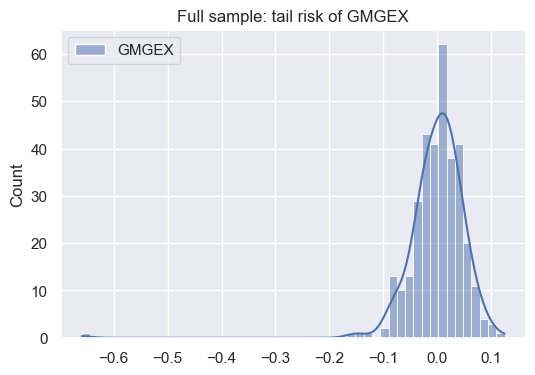

In [108]:
# Calculate (subsample) summary stats
ss1 = helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMGEX']].loc[:'2011-12-31'],
    rf_rate_series = rf_rate['TBill 3M'].loc[:'2011-12-31'])

ss2= helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMGEX']].loc['2012-01-01':],
    rf_rate_series = rf_rate['TBill 3M'].loc['2012-01-01':])

fs = helper_funcs.summary_stats_total_returns(
    total_returns_df= total_returns[['GMGEX']],
    rf_rate_series = rf_rate['TBill 3M'])

# Display results
result = pd.concat([ss1, ss2, fs], axis=0)
result.index = ['1996 - 2011', '2012 - Present', '1996 - Present']
print("Subsample summary statistics:")
display(result)

# visualize tail risk
excess_returns = total_returns.subtract(rf_rate['TBill 3M']/12, axis = 0)
plt.figure(figsize=(6, 4)); sns.histplot(excess_returns[['GMGEX']], kde=True).set_title('Full sample: tail risk of GMGEX')

# Regressions
ss_regress_output = {}
for name, data in subsamples.items():

    # fit reg
    X = sm.add_constant(data[['SPY']])
    model = sm.OLS(data[['GMGEX']], X).fit()
    alpha = model.params[0].round(4)
    beta = model.params[1].round(4)
    r_sq = model.rsquared.round(4)

    # save results
    ss_regress_output[name] = [alpha, beta, r_sq]

reg_output_df = pd.DataFrame(ss_regress_output).T
reg_output_df.columns = ['Apha', 'Beta', 'R-Squared']
print('GMGEX CAPM Regression:')
display(reg_output_df)

### 3. Forecast Regressions

#### (a) Report the r-squared.

In [109]:
reg_covariates = { 'Dividend-Price' : signals[['SPX DVD YLD']], 'Price/Earnings' : signals[['SPX P/E']], 'Full Model' : signals}
shifted_spy = excess_returns['SPY'].shift(-1).dropna()

forecast_r_sq = {}
forecast_vals = {}
for name, data in reg_covariates.items():
    # fit reg
    X = sm.add_constant(data.iloc[:-1]) # last val of y is NA due to shifting
    model = sm.OLS(shifted_spy, X).fit()
    r_sq = model.rsquared.round(4)

    # save results
    forecast_r_sq[name] = [r_sq]
    forecast_vals[name] = model.fittedvalues

rsq_df = pd.DataFrame(forecast_r_sq).T
rsq_df.columns = ['R-Squared']
print('Regression R-squared:')
display(rsq_df)

Regression R-squared:


,R-Squared
Dividend-Price,0.0140
Price/Earnings,0.0060
Full Model,0.0165


#### (b) Calculate the return of the described strategy and report the following statistics:
    
    1. Mean, volatility, Sharpe ratio
    2. Max-drawdown
    3. Market alpha
    4. Market beta
    5. Market Information ratio

In [110]:
# Calculate strategy performance
importlib.reload(helper_funcs)
strategy_performance = {}

for name, estimates in forecast_vals.items():
    # calc strategy returns
    weights = 100 * estimates
    strat_returns = weights * shifted_spy
    
    # calc strategy performance
    strategy_performance[name] = helper_funcs.trading_strat_stats(returns = strat_returns, market_factor = excess_returns['SPY'].iloc[:-1])
    
strategy_stats = pd.concat(strategy_performance, axis = 1).T
print('Trading Strategy Performance:')
display(strategy_stats)

Trading Strategy Performance:


,,Mean,Volatility,Sharpe,VaR (0.05),Max Drawdown,Alpha,Beta,Info Ratio
Dividend-Price,Stats,0.0891,0.1654,0.5388,-0.0492,-1.1416,0.0070,0.0676,0.5066
Price/Earnings,Stats,0.0700,0.1233,0.5679,-0.0494,-0.7657,0.0057,0.0213,0.5541
Full Model,Stats,0.0949,0.1653,0.5739,-0.0475,-1.0155,0.0075,0.0569,0.5468


#### (3) Are risk premium compensation for a security's tendency to lose money in "bad states" of the world?

(a) Calculate month VaR (0.05) for the trading strategies, the market and the GMO portfolios.

(b) See next chunk.

(c) Based on regression estimates, in how many periods we estimate a negative risk premium?

Given the strategies positive mean return and positive alphas, investors certainly received compensation for holding the extra risks associated with equities during our sample period 1996 - 2024. Thus, I estimate that we estimate negative risk premium in the less than half of the periods, namely during the 2000 - 2011 stretch when short-term bonds outperformed equities.

(d) Do you believe the dynamic strategy takes on extra risk?

Our dynamic model with three factors (dividend-price, price/earnings, and short-term rate) demonstrates less risk than the broader market (larger VaR). Compared to the short-term treasury bonds, of course the strategy takes on more risk.



In [111]:
# (a) Monthly VaR
relevant_series = [excess_returns['SPY'], excess_returns['GMWAX'], excess_returns['GMGEX'], rf_rate['TBill 3M']]
series_names = ['SPY', 'GMWAX', 'GMGEX', 'TBill 3M']

print('Monthly VaR (0.05) for each model:')
display(strategy_stats[['VaR (0.05)']])

for name, value in zip(series_names, relevant_series):
    tmp_val = round(value.quantile(0.05), 4)
    print(f"{name}: {tmp_val}")


Monthly VaR (0.05) for each model:


,,VaR (0.05)
Dividend-Price,Stats,-0.0492
Price/Earnings,Stats,-0.0494
Full Model,Stats,-0.0475


SPY: -0.0797
GMWAX: -0.0414
GMGEX: -0.0762
TBill 3M: 0.0001


(b) Does the dynamic portfolio assembled in the previous step under-perform the risk-free rate from 2000 - 2011?

Yes, analysts consider this period the "lost decade" as the SPX started at 1400 in 2000 and ended around 1250 in 2011, producing a negative return. Note that the dynamic portfolio did produce slightly better returns than the SPX. At the same time, short-term bonds produced large returns as the Fed increased rates from 2004 - 2006 to combat inflationary concerns as the economy recovered from the dot-com bubble recession (see inflection point on graph).

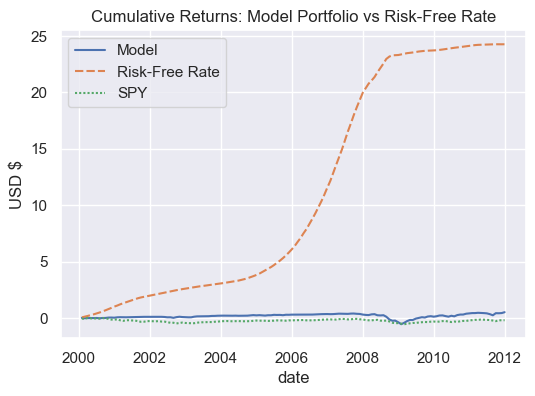

In [112]:
# (b) Does dynamic portfolio (full model) underperform risk-free rate from 2000-2011
model_returns = strat_returns.to_frame()
model_returns['rf_rate'] = rf_rate['TBill 3M']
model_returns['market'] = excess_returns['SPY']
model_returns.columns = ['Model', "Risk-Free Rate", "SPY"]
model_cumulative_return = model_returns.loc['2000-01-01':'2011-12-31'].apply(lambda x: (1 + x).cumprod() - 1)

# Plot the cumulative returns using seaborn
plt.figure(figsize=(6, 4))
sns.lineplot(data=model_cumulative_return)
plt.title('Cumulative Returns: Model Portfolio vs Risk-Free Rate')
plt.ylabel('USD $')
plt.grid(True)
plt.show()
